In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# From 'Heart Disease UCI', found on kaggle.com (https://www.kaggle.com/ronitf/heart-disease-uci)

heart = pd.read_csv('/home/uzi/Downloads/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.columns = ['age','sex','chest_pain_type','rest_bp','cholesterol','fast_bs_>120',
                 'rest_ecg','max_heart_rate','ex_angina','oldpeak','slope','ca','thal','target']

heart.loc[heart['sex'] == 1, 'sex'] = 'male'
heart.loc[heart['sex'] == 0, 'sex'] = 'female'

heart.head()

,age,sex,chest_pain_type,rest_bp,cholesterol,fast_bs_>120,rest_ecg,max_heart_rate,ex_angina,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1


### 1.  Choose one variable and plot that variable four different ways.

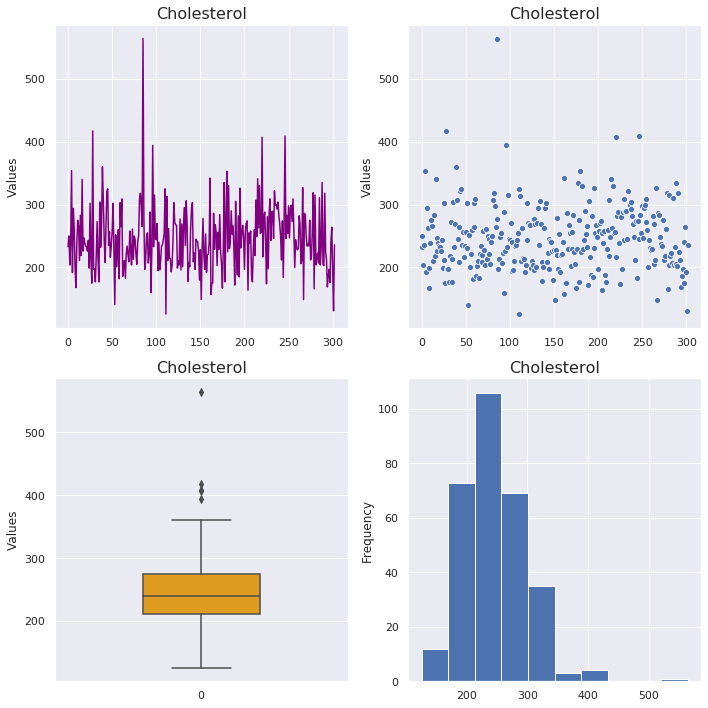

In [4]:
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")

plt.subplot(2,2,1)
sns.lineplot(data=heart['cholesterol'], color='purple')
plt.ylabel('Values')
plt.title('Cholesterol', fontsize=16)

plt.subplot(2,2,2)
sns.scatterplot(data=heart['cholesterol'])
plt.ylabel('Values')
plt.title('Cholesterol', fontsize=16)

plt.subplot(2,2,3)
sns.boxplot(data=heart['cholesterol'], color='orange', width=0.4)
plt.ylabel('Values')
plt.title('Cholesterol', fontsize=16)

plt.subplot(2,2,4)
plt.hist(heart['cholesterol'])
plt.ylabel('Frequency')
plt.title('Cholesterol', fontsize=16)

plt.tight_layout()
plt.show()

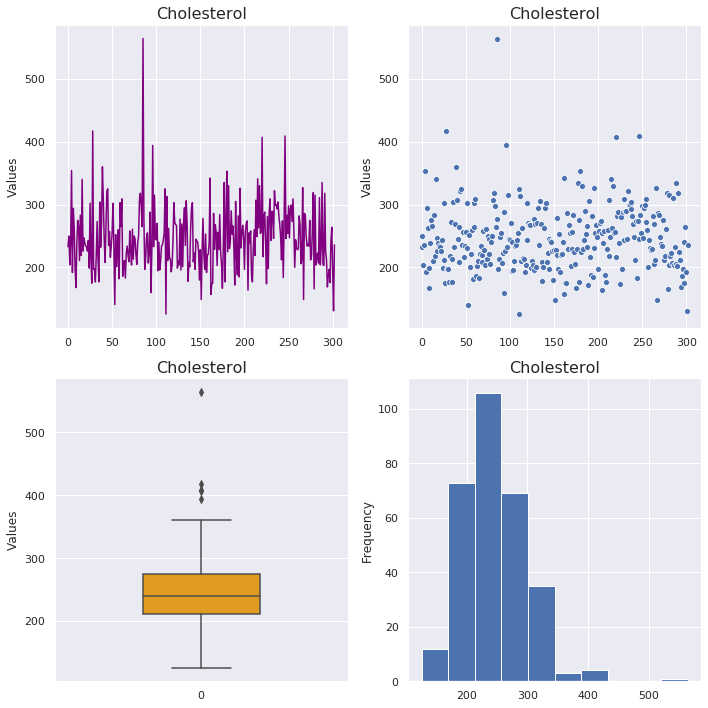

In [21]:
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")

plt.subplot(2,2,1)
sns.lineplot(data=heart['cholesterol'], color='purple')
plt.ylabel('Values')
plt.title('Cholesterol', fontsize=16)

plt.subplot(2,2,2)
sns.scatterplot(data=heart['cholesterol'])
plt.ylabel('Values')
plt.title('Cholesterol', fontsize=16)

plt.subplot(2,2,3)
sns.boxplot(data=heart['cholesterol'], color='orange', width=0.4)
plt.ylabel('Values')
plt.title('Cholesterol', fontsize=16)

plt.subplot(2,2,4)
plt.hist(heart['cholesterol'])
plt.ylabel('Frequency')
plt.title('Cholesterol', fontsize=16)

plt.tight_layout()
plt.show()

- Of all the plots above, the histogram and boxplot provide the most insight since we can actually see the average cholesterol level from the boxplot, as well as the fact that there are four outliers. From the histogram, we can see that most cholesterol scores fall between 200 and 300. The line plot and the scatterplot pretty much just show the variability of the scores, visually. 

### 2. Choose two continuous variables, and plot them three different ways.

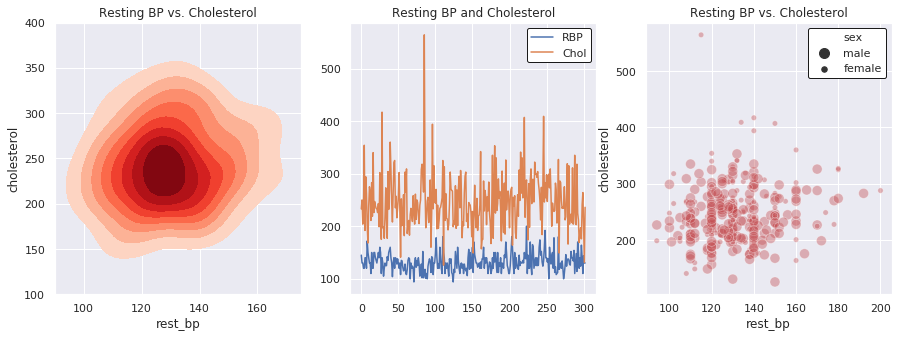

In [5]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.kdeplot(heart.rest_bp, heart.cholesterol, cmap='Reds', shade=True, shade_lowest=False)
plt.ylim(100,400)
plt.xlim(90,175)
plt.title('Resting BP vs. Cholesterol')

plt.subplot(1,3,2)
plt.plot(heart['rest_bp'])
plt.plot(heart['cholesterol'])
plt.title('Resting BP and Cholesterol')
plt.legend(['RBP','Chol'], facecolor='w', edgecolor='k', framealpha=1)

plt.subplot(1,3,3)
sns.scatterplot(x="rest_bp", y="cholesterol", size="sex", sizes=(30, 100), data=heart, color='r', alpha=0.4)
plt.title('Resting BP vs. Cholesterol')
plt.legend(facecolor='w', edgecolor='k', framealpha=1)

plt.show()

- The kdeplot provides a visually appealing distribution for both the resting blood pressure and cholesterol. Once again, the line plot is chaotic and provides little insight. The scatter plot, with different size dots provides a bit of a visual aid to see where each sex clusters, although little specifics could be gleamed from it.

### 3. Choose one continuous variable and one categorical variable, and plot them six different ways.

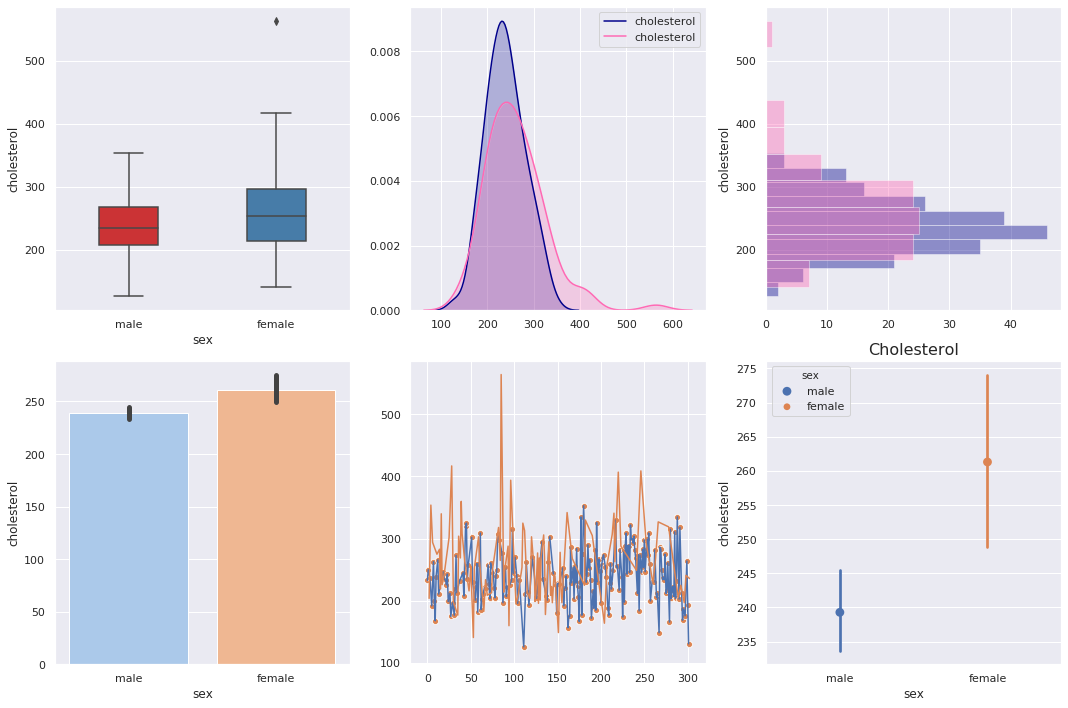

In [22]:
fig, axes = plt.subplots(figsize=(15,10), ncols=3, nrows=2)
                       
sns.boxplot(heart.sex, heart.cholesterol, palette='Set1', width=0.4, ax=axes[0][0])
plt.title('Cholesterol by Sex', size=16)

ax = sns.kdeplot(heart.cholesterol[heart['sex']=='male'], shade=True, color='darkblue', ax=axes[0][1])
sns.kdeplot(heart.cholesterol[heart['sex']=='female'], shade=True, color='hotpink', ax=ax)
plt.legend(['male','female'], facecolor='w',edgecolor='k')
plt.title('Cholesterol by Sex', size=16)

sns.distplot(heart.cholesterol[heart['sex']=='male'], kde=False, vertical=True, color='darkblue', bins=10, ax=axes[0][2])
sns.distplot(heart.cholesterol[heart['sex']=='female'], kde=False, vertical=True, color='hotpink', bins=10, ax=axes[0][2])

sns.barplot(heart.sex, heart.cholesterol, palette='pastel', errwidth=5, ax=axes[1][0])

ax = sns.lineplot(data=heart.cholesterol[heart['sex']=='male'], ax=axes[1][1])
sns.scatterplot(data=heart.cholesterol[heart['sex']=='male'], ax=ax)
sns.lineplot(data=heart.cholesterol[heart['sex']=='female'], ax=ax)
sns.scatterplot(data=heart.cholesterol[heart['sex']=='male'], ax=ax)
plt.ylabel('Values')
plt.title('Cholesterol', fontsize=16)
plt.legend(['male','female'], facecolor='w', edgecolor='k')

sns.pointplot('sex','cholesterol', data=heart, hue='sex', ax=axes[1][2])

plt.tight_layout()
plt.show()

- The boxplot provides the mean and quartile ranges for each sex's cholesterol. We notice only one outlier remains for the females. 
- The kdeplot clearly illustrates that women have higher cholesterol on average than men, as we can see more women score in the higher tail wnd of the distribution. The femaledistribution is wider thaclustersn the men's.
- The horizontal histogram shows the same thing as the kdeplot, albeit in a less visually appealing way.
- The barplot and the point plot show the same thing, except with the absence of the bars, the point plot better captures the range of cholesterol scores by gender.
- The line plot is a jumbled mess. This plot would probavly be better as a scatterplot.

> Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
Probability distributions
Bivariate relationships
Whether the distributions or the relationships vary across groups
Accompany your plot with a written description of what you see.

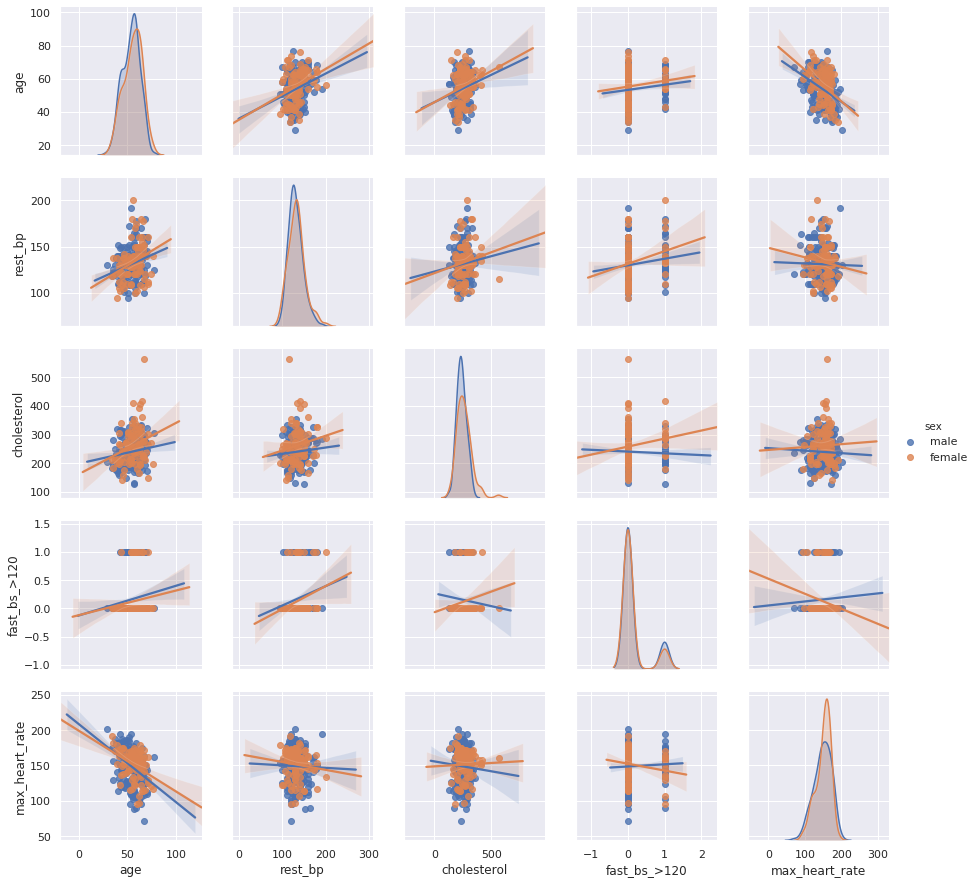

In [32]:
sns.pairplot(heart, hue='sex', kind='reg',vars=['age','rest_bp','cholesterol','fast_bs_>120','max_heart_rate'])
plt.show()

- The women appear to have higher resting blood pressure, maximum heart rate, and cholesterol than the men. The women have lower fasting blood sugar than men, however. From the bivariate plots, we can see that resting blood pressure increases with age and as cholesterol rises. Cholesterol also rises with age, while maximum heart rate decreases with age, especially for men. Interestingly, maximum heart rate increases as cholesterol rises for women while it decreases for men as cholesterol rises. 

# EXTRACURRICULAR PLOTS

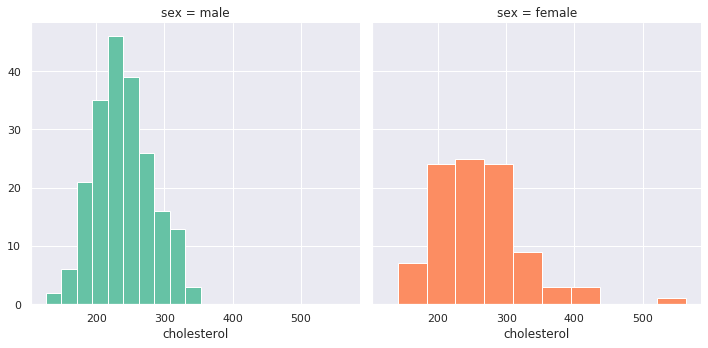

In [7]:
# FacetGrid

g = sns.FacetGrid(heart, col="sex", hue='sex', height=5, palette='Set2')
g.map(plt.hist, "cholesterol");

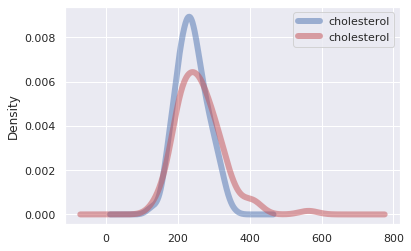

In [15]:
ax = heart.loc[heart.sex == 'male'].plot(kind='density', y='cholesterol', alpha=0.5, linewidth=6)
heart.loc[heart.sex == 'female'].plot(kind='density', y='cholesterol', ax=ax, c='r', alpha=0.5, linewidth=6)
plt.show()

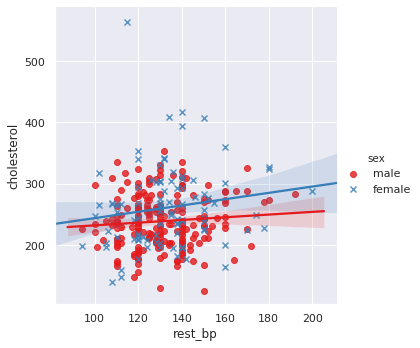

In [20]:
sns.lmplot(x="rest_bp", y="cholesterol", hue="sex", markers=["o", "x"], palette='Set1', height=5, data=heart)

plt.show()

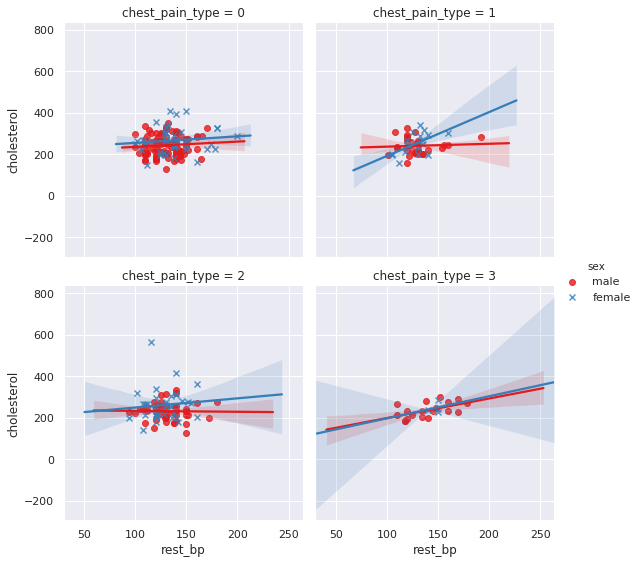

In [9]:
sns.lmplot(x="rest_bp", y="cholesterol", hue="sex", markers=["o", "x"], palette='Set1', height=4, data=heart,
          col='chest_pain_type', col_wrap=2)
plt.show()